In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Credit score Rating

"""
1. Exceptional/Excellent (740-850): Best rates.
2. Very Good (670-739): Good chance of approval.
3. Fair (580-669): May qualify, but with higher rates.
4. Poor (300-579): Harder to get credit

"""

In [20]:
# df = pd.read_csv("C:\\Users\\Anthony\\Pictures\\ml\\supervised-learning\\data\\Loan_approval_data_2025.csv")
# df = pd.read_csv("C:\\Users\\Anthony\\Pictures\\ml\\supervised-learning\\data\\Loan_approval_dataset.csv")
df = pd.read_csv("C:\\Users\\Anthony\\Pictures\\ml\\supervised-learning\\data\\Loan_data.csv")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [9]:
df.shape

(45000, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [11]:
df.isna().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [12]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [14]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [15]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [23]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1


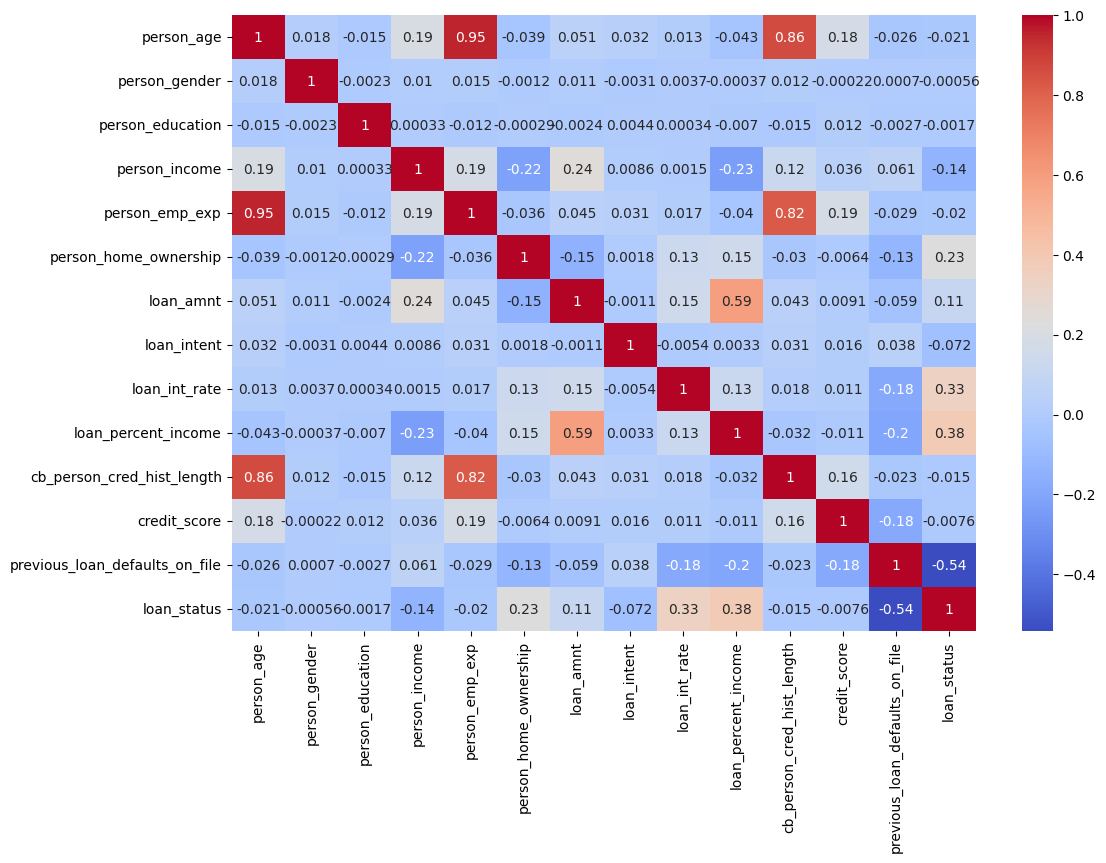

In [26]:
# Advance Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [29]:
df['person_age'].value_counts(normalize=True) * 100

person_age
23.0     11.675556
24.0     11.417778
25.0     10.015556
22.0      9.413333
26.0      8.131111
27.0      6.877778
28.0      6.062222
29.0      5.455556
30.0      4.491111
31.0      3.655556
32.0      3.117778
21.0      2.864444
33.0      2.755556
34.0      2.177778
35.0      1.882222
36.0      1.644444
37.0      1.480000
38.0      1.117778
39.0      0.864444
40.0      0.775556
41.0      0.673333
42.0      0.548889
43.0      0.477778
44.0      0.393333
45.0      0.300000
46.0      0.253333
47.0      0.248889
48.0      0.206667
49.0      0.131111
50.0      0.124444
51.0      0.102222
52.0      0.093333
53.0      0.077778
55.0      0.053333
54.0      0.053333
58.0      0.044444
56.0      0.044444
57.0      0.037778
20.0      0.037778
60.0      0.035556
61.0      0.026667
66.0      0.024444
65.0      0.022222
62.0      0.015556
70.0      0.015556
64.0      0.015556
59.0      0.013333
69.0      0.011111
73.0      0.006667
144.0     0.006667
63.0      0.006667
123.0     0.004444
7

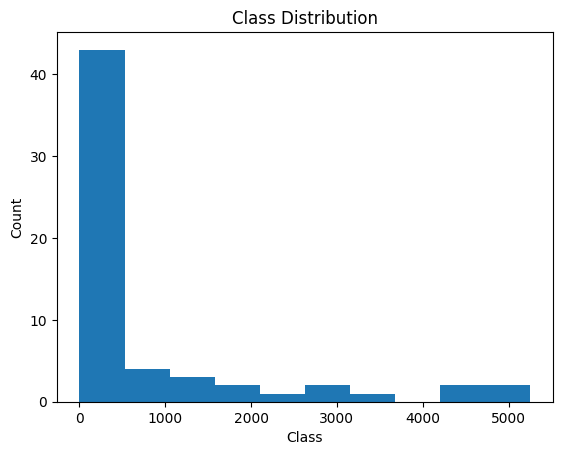

In [31]:
df['person_age'].value_counts().plot(kind='hist')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

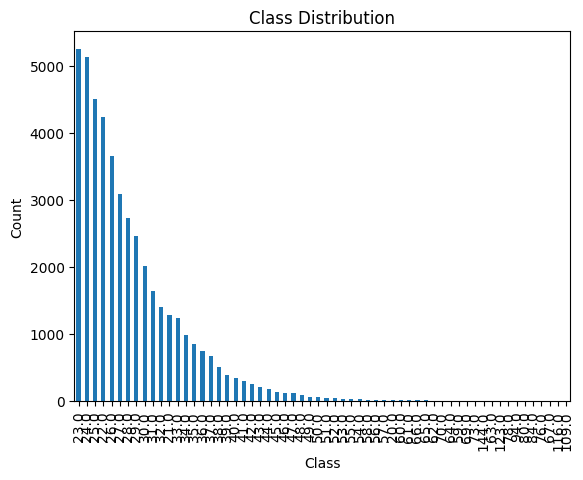

In [32]:
df['person_age'].value_counts().plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [36]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
model = DecisionTreeClassifier(
    class_weight='balanced',
    criterion='gini',
    max_depth=5,
    min_samples_split=10,
    random_state=42
)

In [42]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [40]:
model.fit(X_train, y_train)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",10
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current n

In [44]:
feature_importance = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance

previous_loan_defaults_on_file    0.719485
loan_int_rate                     0.120466
loan_percent_income               0.088632
person_income                     0.055275
person_home_ownership             0.015539
loan_intent                       0.000604
person_education                  0.000000
person_gender                     0.000000
person_age                        0.000000
person_emp_exp                    0.000000
loan_amnt                         0.000000
cb_person_cred_hist_length        0.000000
credit_score                      0.000000
dtype: float64

In [45]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      6990
           1       0.70      0.85      0.77      2010

    accuracy                           0.89      9000
   macro avg       0.83      0.87      0.85      9000
weighted avg       0.90      0.89      0.89      9000

Accuracy: 0.89


array([[6275,  715],
       [ 311, 1699]])

In [46]:
y_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
roc_auc

0.9568802980804133

In [47]:
# convert csv to excel
df.to_excel("C:\\Users\\Anthony\\Pictures\\ml\\supervised-learning\\data\\Loan_data_converted.xlsx", index=False)

In [49]:
loan_data = {
    'person_age': 22,
    'person_gender': 0,
    'person_education': 4,
    'person_income': 71948,
    'person_emp_exp': 0,
    'person_home_ownership': 3,
    'loan_amnt': 35000,
    'loan_intent': 4,
    'loan_int_rate': 16.02,
    'loan_percent_income': 0.49,
    'cb_person_cred_hist_length': 3,
    'credit_score': 561,
    'previous_loan_defaults_on_file': 0,
    'loan_status': 1
}

In [59]:
data = pd.DataFrame([loan_data])
prediction = model.predict(data.drop('loan_status', axis=1))
prediction_proba = model.predict_proba(data.drop('loan_status', axis=1))

if prediction[0] == 1:
    print(f"Loan Approved status: {prediction[0]}")
    print(f"Probability of getting the loan next time: {prediction_proba[0][1]}")
else:
    print("Loan Not Approved")


Loan Approved status: 1
Probability of getting the loan next time: 0.9969377414866144


In [52]:
loan_data_2 = {
    'person_age': 21,
    'person_gender': 0,
    'person_education': 3,
    'person_income': 12282,
    'person_emp_exp': 0,
    'person_home_ownership': 2,
    'loan_amnt': 1000,
    'loan_intent': 1,
    'loan_int_rate': 11.14,
    'loan_percent_income': 0.08,
    'cb_person_cred_hist_length': 2,
    'credit_score': 504,
    'previous_loan_defaults_on_file': 1,
    'loan_status': 0
}

In [60]:
df = pd.DataFrame([loan_data_2])
prediction = model.predict(df.drop('loan_status', axis=1))
prediction_prob = model.predict_proba(df.drop('loan_status', axis=1))

if prediction[0] == 1:
    print(f"Loan Approved status: {prediction[0]}")
    print(f"Probability of getting the loan next time: {prediction_prob[0][1]}")
else:
    print("Loan Not Approved")

Loan Not Approved
